# Geospatial Analysis of Earthquake Data

### **Objective:**
Analyze global earthquake data to study patterns by region, magnitude, and depth. Visualize earthquake hotspots on maps and build a classification model to predict earthquake magnitude categories (low, medium, high).


### **Deliverables Covered in this Project:**
1.  **Exploratory Data Analysis (EDA):** Distribution of magnitudes, depth vs. location.
2.  **Geospatial Visualizations:** World heatmap, scatter maps of epicenters.
3.  **Clustering:** K-Means clustering of earthquakes by location and magnitude.
4.  **Model Building:** A classification model to predict magnitude categories.
5.  **Interpretation:** Comments and markdown text guide you on interpreting the results.

## Step 1: Install and Import Required Libraries

We start by installing the necessary libraries. This step is crucial as we are running this in a Colab notebook and libraries for mapping like `folium` are not installed by default. The `!` prefix tells Colab to run the command in the shell.

In [1]:
!pip install pandas matplotlib seaborn folium scikit-learn

Here, we import all the libraries we will use throughout the project.

1. **pandas**: Used to load, clean, and manipulate the earthquake dataset.
2. **matplotlib.pyplot**: Used to create plots like histograms, bar charts, and scatter plots.
3. **seaborn**: Used to create statistical plots such as pair plots, correlation heatmaps, and improved styling.
4. **folium**: Used for building interactive maps.
5. **HeatMap from folium.plugins**: Used to add a heatmap layer on a folium map to visualize earthquake hotspots by showing places with higher density of events.
6. **KMeans from sklearn.cluster**: Used for clustering earthquakes based on features like latitude and longitude.
7. **train_test_split from sklearn.model_selection**: Used to split the dataset into training and testing sets for the machine learning model.
8. **RandomForestClassifier from sklearn.ensemble**: Uses a machine learning model used to classify earthquakes by their magnitude category by building many decision trees and combining their predictions.
9. **unique_labels from sklearn.utils.multiclass**: Used to get the set of unique class labels present in the true and predicted values when generating evaluation metrics.
10. **accuracy_score and classification_report from sklearn.metrics**: Used to evaluate the model’s performance.
11. **warnings**: Suppresses warning messages in the notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load and Prepare the Data

Now we load the CSV file into a Pandas DataFrame.

A DataFrame is a 2D labeled data structure, like a spreadsheet or a SQL table, which makes it easy to work with data.

In [3]:
file_id = "1Kk4Goatfx4oTqWtgXGbdEG150fxxKsLe"
file_url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(file_url)

Head of the Dataset

In [4]:
print(df.head())

         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

Dataset Information

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

### Data Cleaning
Data cleaning and preprocessing is a critical step. We focus on the most important columns for our analysis: `Latitude`, `Longitude`, `Magnitude`, and `Depth`.

We performed the following steps:
1. Drop any rows where these key columns have missing values.
2. Filter the data to include only events of `Type` 'Earthquake'.
3. Convert 'Date' and 'Time' columns into a single `DateTime` object for easier manipulation.

In [6]:
df.dropna(subset=['Latitude', 'Longitude', 'Magnitude', 'Depth'], inplace=True)

df = df[df['Type'] == 'Earthquake']

df['DateTime'] = pd.to_datetime(df['Date'], errors='coerce')

Dataset after Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23232 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23232 non-null  object        
 1   Time                        23232 non-null  object        
 2   Latitude                    23232 non-null  float64       
 3   Longitude                   23232 non-null  float64       
 4   Type                        23232 non-null  object        
 5   Depth                       23232 non-null  float64       
 6   Depth Error                 4449 non-null   float64       
 7   Depth Seismic Stations      7084 non-null   float64       
 8   Magnitude                   23232 non-null  float64       
 9   Magnitude Type              23229 non-null  object        
 10  Magnitude Error             315 non-null    float64       
 11  Magnitude Seismic Stations  2460 non-null   float64       


## Step 3: Exploratory Data Analysis (EDA)

In this step, we have created visualizations to understand the characteristics and distribution of our data.

### 3.1 Distribution of Earthquake Magnitudes

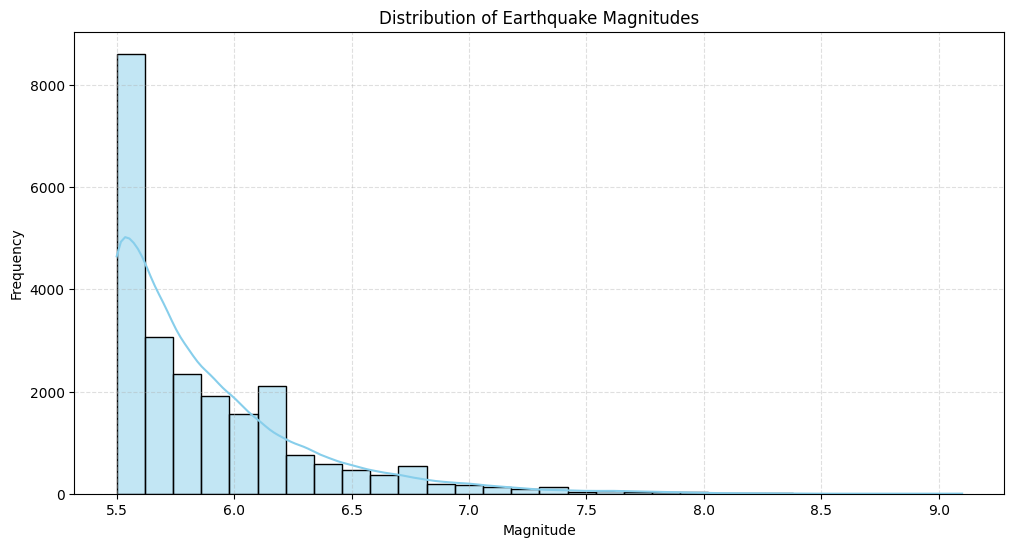

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Magnitude'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

**Interpretation:** This histogram shows the frequency of earthquakes at different magnitude ranges. We observe that lower-magnitude earthquakes are far more common, while high-magnitude events are rare. This follows a power-law distribution, which is typical for earthquake data.

### 3.2 Relationship between Depth and Magnitude

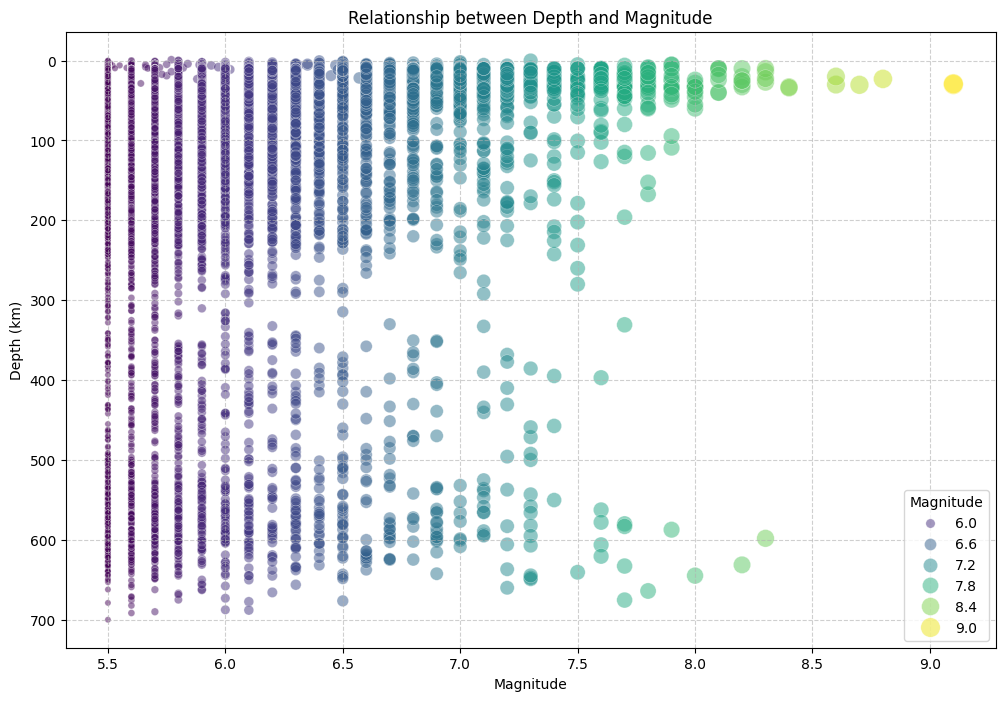

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Magnitude', y='Depth', data=df, alpha=0.5, hue='Magnitude', palette='viridis', size='Magnitude', sizes=(20, 200))
plt.title('Relationship between Depth and Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

**Interpretation:** This scatter plot helps us visualize if there's any correlation between how deep an earthquake occurs and its magnitude.

The size and color of the points are also mapped to the magnitude for a richer visual. We can see a high concentration of earthquakes at shallower depths across all magnitudes.

### 3.3 Geospatial Distribution of Earthquakes by Depth

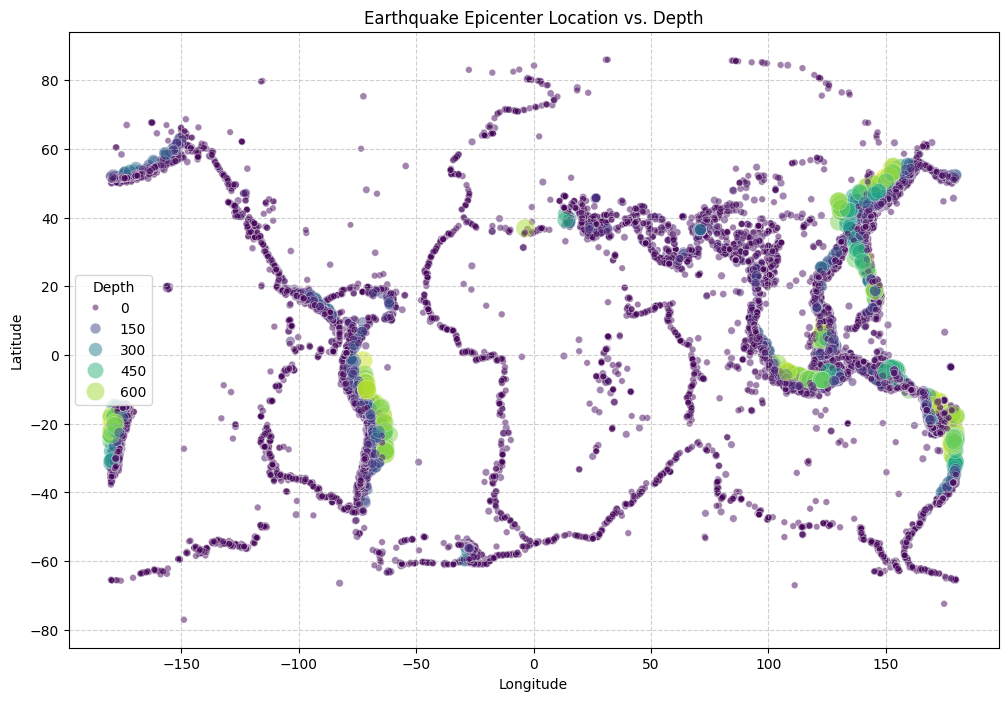

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5, hue='Depth', palette='viridis', size='Depth', sizes=(20, 200))
plt.title('Earthquake Epicenter Location vs. Depth')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Interpretation:** This plot shows where earthquakes occur on a global scale, with color indicating the depth. You should be able to clearly see the outlines of tectonic plates, especially the Pacific Ring of Fire, where a majority of seismic activity is concentrated.

## Step 4: Geospatial Visualizations with Folium

While the previous plots are informative, interactive maps provide a much richer experience. We'll use `folium` to plot earthquake data on a world map.

The following cells will generate `.html` files. To view them, go to the file browser on the left sidebar in Colab, and you can download and open them in your web browser.

### 4.1 Interactive Scatter Map of Earthquakes

In [11]:
world_map = folium.Map(location=[0, 0], zoom_start=2)

for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Magnitude'] * 2,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        tooltip=f"Magnitude: {row['Magnitude']}<br>Depth: {row['Depth']} km"
    ).add_to(world_map)

world_map.save("earthquake_scatter_map.html")
print("Interactive scatter map saved to earthquake_scatter_map.html. Open this file to view the map.")

Interactive scatter map saved to earthquake_scatter_map.html. Open this file to view the map.


### 4.2 World Heatmap of Earthquakes
A heatmap shows the "density" or concentration of points. Areas with more frequent or stronger earthquakes will appear "hotter".

Prepare data for the heatmap.
The format should be a list of lists: [[lat, lon, weight]].
'Weight' can be the magnitude to make stronger earthquakes contribute more to the heat.

In [12]:
world_heatmap = folium.Map(location=[0, 0], zoom_start=2)

heat_data = [[row['Latitude'], row['Longitude'], row['Magnitude']] for index, row in df.iterrows()]

HeatMap(heat_data).add_to(world_heatmap)

world_heatmap.save("earthquake_heatmap.html")
print("Interactive heatmap saved to earthquake_heatmap.html. Open this file to view the map.")

Interactive heatmap saved to earthquake_heatmap.html. Open this file to view the map.


**Interpretation:** The heatmap visually confirms the earthquake "hotspots" around the globe. The brightest areas highlight regions with the highest concentration and intensity of seismic activity, again mapping clearly to the boundaries of tectonic plates.

## Step 5: Clustering Earthquakes with K-Means

We use the K-Means algorithm to find natural groupings (clusters) of earthquakes based on their location and magnitude.

### 5.1 Finding the Optimal Number of Clusters (Elbow Method)
A key step in K-Means is to determine the optimal number of clusters (K). We use the "Elbow Method" for this. It involves plotting the sum of squared distances for different values of K and looking for an "elbow" in the plot, which represents a good balance between the number of clusters and the variance within each cluster.

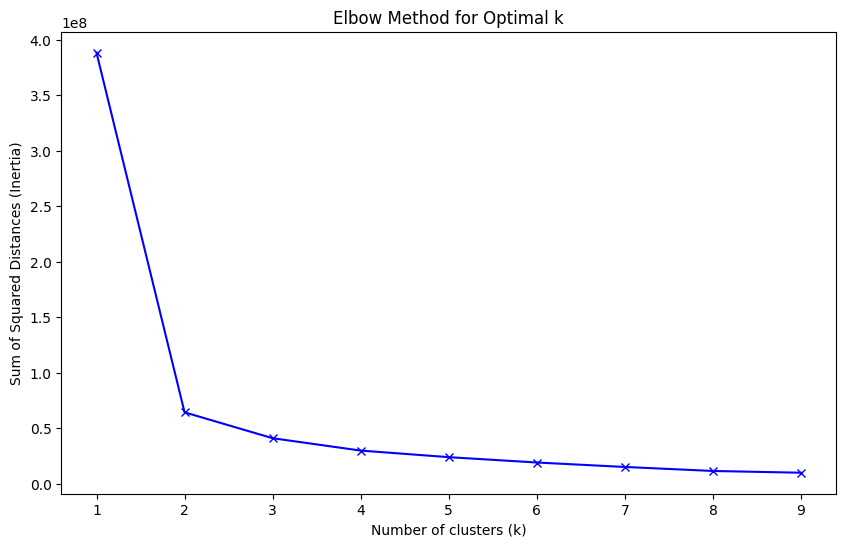

In [13]:
features = df[['Latitude', 'Longitude', 'Magnitude']]

sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

**Interpretation:** Look at this plot. The "elbow" is the point where the rate of decrease in the sum of squared distances sharply slows down. This indicates that adding more clusters beyond that point provides diminishing returns. Based on the plot, a K value between 3 and 5 seems reasonable. Let's choose **K=4** for our model.

### 5.2 Applying K-Means and Visualizing Clusters

In [14]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features)

print("\nK-Means clustering completed. Here's a count of earthquakes per cluster:")
print(df['Cluster'].value_counts())

cluster_map = folium.Map(location=[0, 0], zoom_start=2)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']

for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Magnitude'] * 2,
        color=colors[row['Cluster'] % len(colors)],
        fill=True,
        fill_color=colors[row['Cluster'] % len(colors)],
        fill_opacity=0.6,
        tooltip=f"Cluster: {row['Cluster']}<br>Magnitude: {row['Magnitude']}"
    ).add_to(cluster_map)

cluster_map.save("earthquake_clusters_map.html")
print("Interactive cluster map saved to earthquake_clusters_map.html. Open this file to view the clusters.")


K-Means clustering completed. Here's a count of earthquakes per cluster:
Cluster
2    11608
3     4730
1     3890
0     3004
Name: count, dtype: int64
Interactive cluster map saved to earthquake_clusters_map.html. Open this file to view the clusters.


**Interpretation:** This map shows geographically distinct groups of earthquakes. You can now analyze what defines each cluster. Are they geographically close? Do they have similar magnitudes? This unsupervised learning technique helps uncover hidden structures in the data.

## Step 6: Model Building (Classification)

Finally, we'll build a classification model to predict the magnitude category (`low`, `medium`, `high`) of an earthquake based on its location and depth.

### 6.1 Feature Engineering and Data Splitting
First, we need to create our target variable by categorizing the continuous `Magnitude` column. Then, we define our features (X) and target (y) and split the data into training and testing sets.

In [15]:
def categorize_magnitude(magnitude):
    if magnitude < 5.0:
        return 'low'
    elif 5.0 <= magnitude < 7.0:
        return 'medium'
    else:
        return 'high'

df['Magnitude_Category'] = df['Magnitude'].apply(categorize_magnitude)
print("\nMagnitude categories created. Here's the distribution:")
print(df['Magnitude_Category'].value_counts())

features_for_model = ['Depth', 'Latitude', 'Longitude']
target = 'Magnitude_Category'

X = df[features_for_model]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training (80%) and testing (20%) sets.")
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(y_test)} samples")


Magnitude categories created. Here's the distribution:
Magnitude_Category
medium    22494
high        738
Name: count, dtype: int64

Data split into training (80%) and testing (20%) sets.
Training set size: 18585 samples
Testing set size: 4647 samples


### 6.2 Training and Evaluating the Model
We will use a RandomForestClassifier. It's a powerful and popular algorithm that works by building a "forest" of decision trees and outputting the class that is the mode of the classes of the individual trees.


Training the model...
Model training completed.

Model Evaluation:
Accuracy: 0.96729

Classification Report:
              precision    recall  f1-score   support

         low   0.000000  0.000000  0.000000         0
      medium   0.968124  0.999111  0.983373      4499
        high   0.000000  0.000000  0.000000       148

    accuracy                       0.967291      4647
   macro avg   0.322708  0.333037  0.327791      4647
weighted avg   0.937291  0.967291  0.952054      4647



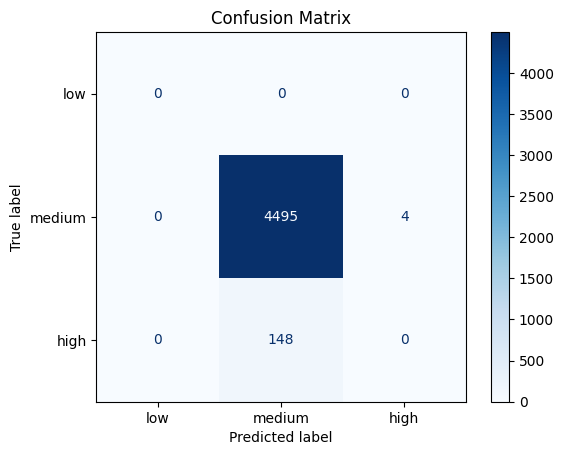

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
labels = ['low', 'medium', 'high']
print("\nTraining the model...")
model.fit(X_train, y_train)
print("Model training completed.")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=labels, zero_division=0, digits=6)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.5f}")
print("\nClassification Report:")
print(report)

# Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Interpretation of Model Performance

* **Accuracy:** This score tells you the overall percentage of predictions the model got right. Because the classes are imbalanced (many more 'low' than 'high'), accuracy alone can be misleading.

* **Classification Report:** This gives more detailed metrics for each category:
    * **Precision:** Of all the predictions for a category, how many were correct? (e.g., of all the earthquakes we predicted as 'high', how many actually were 'high'?).
    * **Recall:** Of all the actual instances of a category, how many did the model correctly identify? (e.g., of all the actual 'high' magnitude earthquakes, how many did we find?).
    * **F1-Score:** The harmonic mean of precision and recall. It's a good single metric for evaluating a model on imbalanced datasets.

We notice that the model performs very well for the 'medium' category but struggles with 'low' and 'high' categories. This is due to the severe class imbalance in the dataset—the model has very few examples of high-magnitude earthquakes to learn from.

# Improving Imbalance using SMOTE

Now, we apply class weights to the `RandomForestClassifier` by setting `class_weight='balanced'`, then retrain and re-evaluate the model's performance using the classification report.

In [17]:
!pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training target distribution:")
print(y_train.value_counts())
print("\nResampled training target distribution:")
print(y_train_resampled.value_counts())

Original training target distribution:
Magnitude_Category
medium    17995
high        590
Name: count, dtype: int64

Resampled training target distribution:
Magnitude_Category
medium    17995
high      17995
Name: count, dtype: int64



Training the model with SMOTE-augmented data...
Model training completed.

Model Evaluation with SMOTE:
Accuracy: 0.87239

Classification Report:
              precision    recall  f1-score   support

         low   0.000000  0.000000  0.000000         0
      medium   0.971056  0.894866  0.931405      4499
        high   0.055888  0.189189  0.086287       148

    accuracy                       0.872391      4647
   macro avg   0.342315  0.361352  0.339231      4647
weighted avg   0.941910  0.872391  0.904490      4647



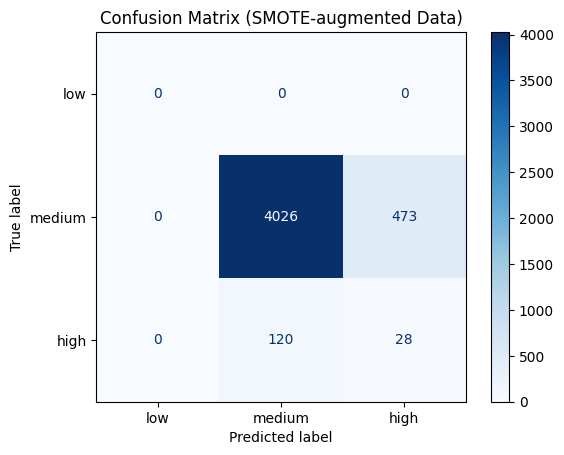

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
labels = ['low', 'medium', 'high']
print("\nTraining the model with SMOTE-augmented data...")
model.fit(X_train_resampled, y_train_resampled)
print("Model training completed.")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=labels, zero_division=0, digits=6)

print("\nModel Evaluation with SMOTE:")
print(f"Accuracy: {accuracy:.5f}")
print("\nClassification Report:")
print(report)

# Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_smote = confusion_matrix(y_test, y_pred, labels=labels)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=labels)
disp_smote.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SMOTE-augmented Data)')
plt.show()

# Hyperparameter Tuning on Random Forest Classifier on Original Training Data
Tune the hyperparameters of the `RandomForestClassifier` using `GridSearchCV` on the original training data (`X_train`, `y_train`) and then evaluate its performance on the test set (`X_test`, `y_test`).

In [20]:
from sklearn.model_selection import GridSearchCV

# 2. Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced'] # Include class_weight='balanced' to address class imbalance
}

# 3. Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', # Use f1_macro for imbalanced datasets
                           n_jobs=-1, # Use all available cores
                           verbose=1)

print("\nStarting GridSearchCV for RandomForestClassifier...")
# 5. Fit GridSearchCV to the original training data
grid_search.fit(X_train, y_train)
print("GridSearchCV completed.")

# 6. Print the best parameters
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# 7. Print the best cross-validation score
print("\nBest cross-validation f1_macro score:")
print(f"{grid_search.best_score_:.5f}")


Starting GridSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
GridSearchCV completed.

Best parameters found by GridSearchCV:
{'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 150}

Best cross-validation f1_macro score:
0.50409



Evaluating the tuned RandomForestClassifier on the test set...

Model Evaluation for Tuned RandomForestClassifier (pre-SMOTE):
Accuracy: 0.83344

Classification Report:
              precision    recall  f1-score   support

         low   0.000000  0.000000  0.000000         0
      medium   0.969735  0.854634  0.908554      4499
        high   0.041056  0.189189  0.067470       148

    accuracy                       0.833441      4647
   macro avg   0.336930  0.347941  0.325341      4647
weighted avg   0.940158  0.833441  0.881767      4647



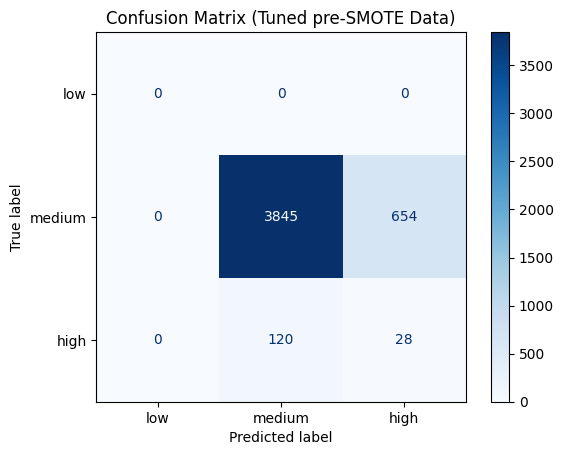

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_rf_model = grid_search.best_estimator_

print("\nEvaluating the tuned RandomForestClassifier on the test set...")
y_pred_tuned = best_rf_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned, labels=labels, zero_division=0, digits=6)

print("\nModel Evaluation for Tuned RandomForestClassifier (pre-SMOTE):")
print(f"Accuracy: {accuracy_tuned:.5f}")
print("\nClassification Report:")
print(report_tuned)

cm_tuned = confusion_matrix(y_test, y_pred_tuned, labels=labels)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=labels)
disp_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned pre-SMOTE Data)')
plt.show()

## Hyperparameter Tuning on Random Forest Classifier on Training Data after applying SMOTE

### Subtask:
Apply GridSearchCV to find the optimal hyperparameters for the RandomForestClassifier using the SMOTE-augmented training data (`X_train_resampled`, `y_train_resampled`). We will use the same parameter grid as before.


In [22]:
from sklearn.model_selection import GridSearchCV

# Instantiate a RandomForestClassifier
rf_classifier_smote = RandomForestClassifier(random_state=42)

print("\nStarting GridSearchCV for RandomForestClassifier with SMOTE-augmented data...")
# Initialize and fit GridSearchCV to the SMOTE-augmented training data
grid_search_smote = GridSearchCV(estimator=rf_classifier_smote,
                                param_grid=param_grid,
                                cv=5,
                                scoring='f1_macro',
                                n_jobs=-1,
                                verbose=1)
grid_search_smote.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV with SMOTE-augmented data completed.")

# Print the best parameters
print("\nBest parameters found by GridSearchCV with SMOTE-augmented data:")
print(grid_search_smote.best_params_)

# Print the best cross-validation score
print("\nBest cross-validation f1_macro score with SMOTE-augmented data:")
print(f"{grid_search_smote.best_score_:.5f}")


Starting GridSearchCV for RandomForestClassifier with SMOTE-augmented data...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
GridSearchCV with SMOTE-augmented data completed.

Best parameters found by GridSearchCV with SMOTE-augmented data:
{'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 150}

Best cross-validation f1_macro score with SMOTE-augmented data:
0.90457



Evaluating the tuned RandomForestClassifier (with SMOTE) on the test set...

Model Evaluation for Tuned RandomForestClassifier (with SMOTE):
Accuracy: 0.87261

Classification Report:
              precision    recall  f1-score   support

         low   0.000000  0.000000  0.000000         0
      medium   0.971063  0.895088  0.931529      4499
        high   0.056000  0.189189  0.086420       148

    accuracy                       0.872606      4647
   macro avg   0.342354  0.361426  0.339316      4647
weighted avg   0.941920  0.872606  0.904614      4647



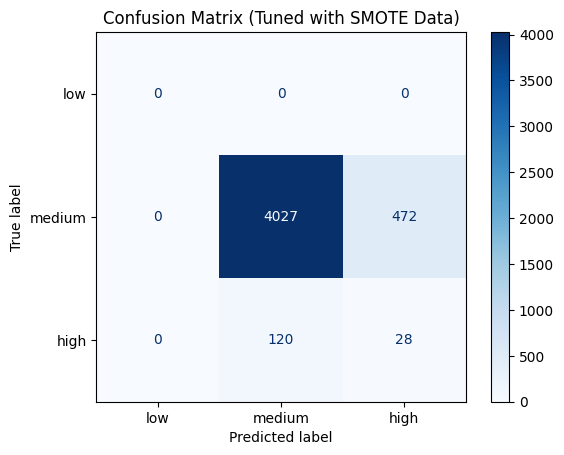

In [23]:
best_rf_model_smote = grid_search_smote.best_estimator_

print("\nEvaluating the tuned RandomForestClassifier (with SMOTE) on the test set...")
y_pred_tuned_smote = best_rf_model_smote.predict(X_test)

accuracy_tuned_smote = accuracy_score(y_test, y_pred_tuned_smote)
report_tuned_smote = classification_report(y_test, y_pred_tuned_smote, labels=labels, zero_division=0, digits=6)

print("\nModel Evaluation for Tuned RandomForestClassifier (with SMOTE):")
print(f"Accuracy: {accuracy_tuned_smote:.5f}")
print("\nClassification Report:")
print(report_tuned_smote)

# Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_tuned_smote = confusion_matrix(y_test, y_pred_tuned_smote, labels=labels)
disp_tuned_smote = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_smote, display_labels=labels)
disp_tuned_smote.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned with SMOTE Data)')
plt.show()

In [24]:
initial_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("\nTraining the initial RandomForestClassifier (without class_weight or SMOTE)...")
initial_rf_model.fit(X_train, y_train)
print("Model training completed.")

y_pred_initial_rf = initial_rf_model.predict(X_test)

accuracy_initial_rf = accuracy_score(y_test, y_pred_initial_rf)
report_initial_rf = classification_report(y_test, y_pred_initial_rf, labels=labels, zero_division=0, digits=6)

print("\nModel Evaluation for Initial RandomForestClassifier:")
print(f"Accuracy: {accuracy_initial_rf:.5f}")
print("\nClassification Report:")
print(report_initial_rf)



Training the initial RandomForestClassifier (without class_weight or SMOTE)...
Model training completed.

Model Evaluation for Initial RandomForestClassifier:
Accuracy: 0.96729

Classification Report:
              precision    recall  f1-score   support

         low   0.000000  0.000000  0.000000         0
      medium   0.968124  0.999111  0.983373      4499
        high   0.000000  0.000000  0.000000       148

    accuracy                       0.967291      4647
   macro avg   0.322708  0.333037  0.327791      4647
weighted avg   0.937291  0.967291  0.952054      4647



## Extract Metrics from Reports

Parse the classification reports from the initial, SMOTE-augmented, tuned (pre-SMOTE), and tuned (with SMOTE) RandomForest models to extract key metrics (Precision, Recall, F1-Score for 'high' and 'medium' categories, and Accuracy) for each model variation, ensuring correct model predictions are used for each report.


In [26]:
from sklearn.metrics import classification_report
import pandas as pd

def parse_classification_report(model_obj, model_name, treatment_name, y_true, X_test, labels):
    """Parses a classification report to extract key metrics."""
    y_pred = model_obj.predict(X_test)
    report_data = classification_report(y_true, y_pred, labels=labels, output_dict=True, zero_division=0)

    metrics = {
        'Model': model_name,
        'Treatment': treatment_name,
        'Accuracy': report_data['accuracy']
    }
    for cls in ['high', 'medium']:
        metrics[f'{cls.capitalize()} Precision'] = report_data[cls]['precision']
        metrics[f'{cls.capitalize()} Recall'] = report_data[cls]['recall']
        metrics[f'{cls.capitalize()} F1-Score'] = report_data[cls]['f1-score']
    return metrics

# 3. Create a new RandomForestClassifier instance named smote_only_rf_model
smote_only_rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
print("\nTraining the SMOTE-only RandomForestClassifier...")
smote_only_rf_model.fit(X_train_resampled, y_train_resampled)
print("SMOTE-only model training completed.")

metrics_list = [
    parse_classification_report(initial_rf_model, 'RandomForest', 'None (Baseline)', y_test, X_test, labels),
    parse_classification_report(smote_only_rf_model, 'RandomForest', 'SMOTE Only', y_test, X_test, labels),
    parse_classification_report(best_rf_model, 'RandomForest', 'Tuned (pre-SMOTE)', y_test, X_test, labels),
    parse_classification_report(best_rf_model_smote, 'RandomForest', 'Tuned (with SMOTE)', y_test, X_test, labels)
]

# 5. Create a Pandas DataFrame named performance_df
performance_df = pd.DataFrame(metrics_list)

# 6. Print the performance_df
print("\nPerformance Comparison of RandomForest Models:")
print(performance_df.round(4).to_string(index=False))


Training the SMOTE-only RandomForestClassifier...
SMOTE-only model training completed.

Performance Comparison of RandomForest Models:
       Model          Treatment  Accuracy  High Precision  High Recall  High F1-Score  Medium Precision  Medium Recall  Medium F1-Score
RandomForest    None (Baseline)    0.9673          0.0000       0.0000         0.0000            0.9681         0.9991           0.9834
RandomForest         SMOTE Only    0.8724          0.0559       0.1892         0.0863            0.9711         0.8949           0.9314
RandomForest  Tuned (pre-SMOTE)    0.8334          0.0411       0.1892         0.0675            0.9697         0.8546           0.9086
RandomForest Tuned (with SMOTE)    0.8726          0.0560       0.1892         0.0864            0.9711         0.8951           0.9315


## Performance Visualization: Accuracy, Precision, and Recall Comparison

These plots visualize the key performance metrics (Accuracy, Precision, Recall for 'high' and 'medium' magnitude categories) for each of the four RandomForest model variations. This allows for a clear comparison of how each treatment (no treatment, SMOTE only, tuned pre-SMOTE, tuned with SMOTE) impacted the model's ability to classify earthquakes.

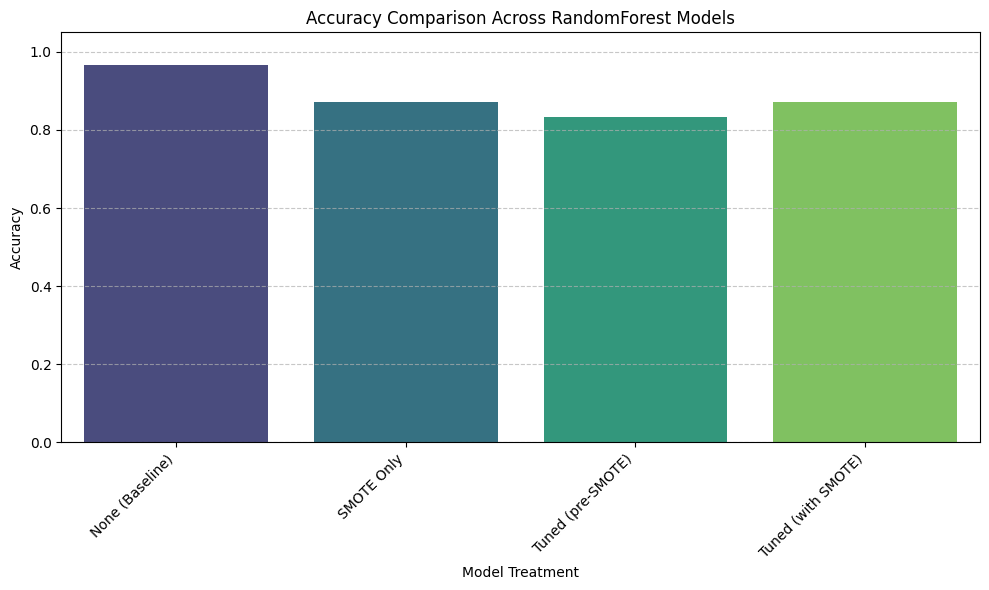

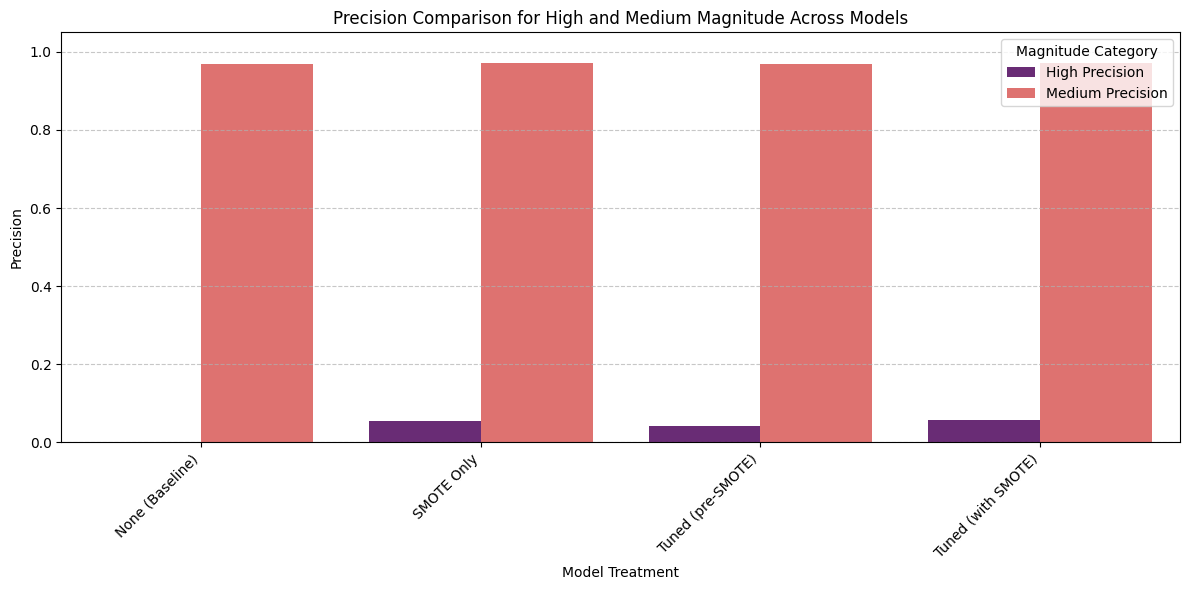

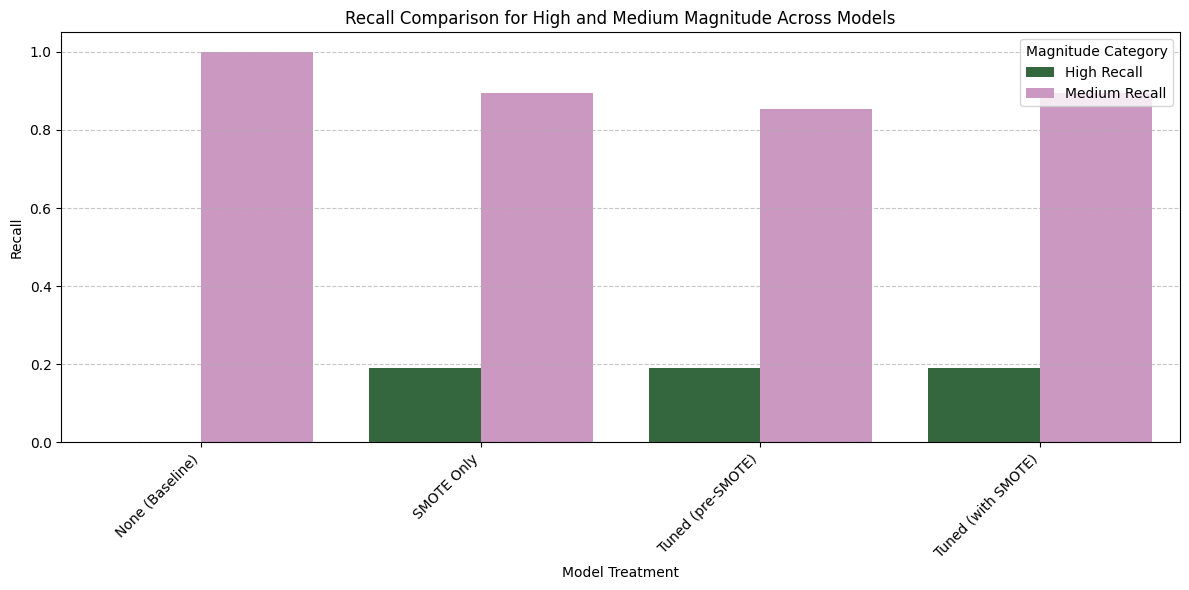

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Treatment', y='Accuracy', data=performance_df, palette='viridis')
plt.title('Accuracy Comparison Across RandomForest Models')
plt.xlabel('Model Treatment')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Precision Comparison
precision_melted = performance_df.melt(id_vars=['Model', 'Treatment'],
                                        value_vars=['High Precision', 'Medium Precision'],
                                        var_name='Metric', value_name='Precision')

plt.figure(figsize=(12, 6))
sns.barplot(x='Treatment', y='Precision', hue='Metric', data=precision_melted, palette='magma')
plt.title('Precision Comparison for High and Medium Magnitude Across Models')
plt.xlabel('Model Treatment')
plt.ylabel('Precision')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Magnitude Category')
plt.tight_layout()
plt.show()

# Plot 3: Recall Comparison
recall_melted = performance_df.melt(id_vars=['Model', 'Treatment'],
                                     value_vars=['High Recall', 'Medium Recall'],
                                     var_name='Metric', value_name='Recall')

plt.figure(figsize=(12, 6))
sns.barplot(x='Treatment', y='Recall', hue='Metric', data=recall_melted, palette='cubehelix')
plt.title('Recall Comparison for High and Medium Magnitude Across Models')
plt.xlabel('Model Treatment')
plt.ylabel('Recall')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Magnitude Category')
plt.tight_layout()
plt.show()

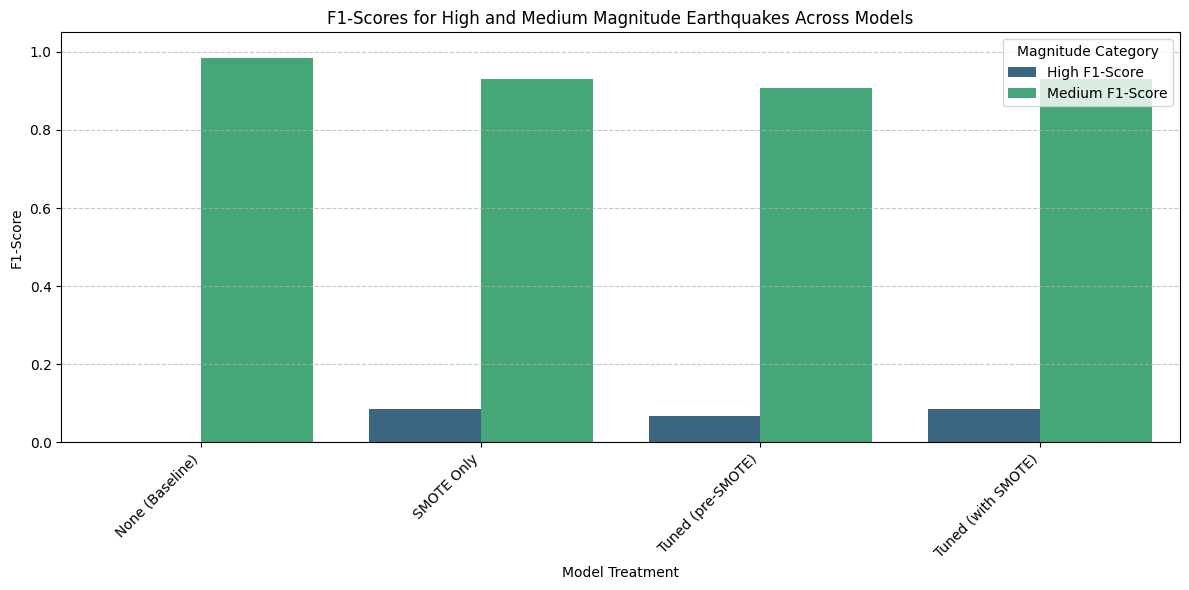

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure performance_df is available, if not, re-run its creation
# (assuming the previous cells creating performance_df have been run)

# Melt the DataFrame for easier plotting of F1-scores
f1_melted = performance_df.melt(id_vars=['Model', 'Treatment'],
                                 value_vars=['High F1-Score', 'Medium F1-Score'],
                                 var_name='Metric', value_name='F1-Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Treatment', y='F1-Score', hue='Metric', data=f1_melted, palette='viridis')
plt.title('F1-Scores for High and Medium Magnitude Earthquakes Across Models')
plt.xlabel('Model Treatment')
plt.ylabel('F1-Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Magnitude Category')
plt.tight_layout()
plt.show()